# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn
# !pip3 install missingpy
# !pip3 install urlextract
# !python -m spacy download en_core_web_sm
# !pip3 install shap
# Download en_core_web_sm for text analytics

## Main Function

Enter the path here : datasets/accepted_short.csv
Attempting to import 100 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 151 columns and 100 rows

DataFrame Succesfully imported

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

Enter 'quit' to quit
What would you like to predict? : loan_amnt
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Is the column 'id' an identification column? If yes, enter y : y
Identification column obtained
Do you think you have Suc

Dataset size has been capped to 1 million rows for better performance
Length of the dataset is now 1000000
Length of the dataframe entering INIT is:  1000000
                                            Missing in %
member_id                                         100.00
desc                                               99.99
orig_projected_additional_accrued_interest         99.55
hardship_loan_status                               99.43
hardship_type                                      99.43
hardship_reason                                    99.43
hardship_status                                    99.43
deferral_term                                      99.43
hardship_amount                                    99.43
hardship_start_date                                99.43

 ### Entering Numeric Engineering of Target### 

		 stripping spaces, symbols, and lower casing all entries
done ...
		 Replacing empty and invalid strings
done ...
		 Replacing commas if present in Currencies
done

                    Missing in %
il_util                    48.64
mths_since_rcnt_il         41.80
all_util                   39.91
open_acc_6m                39.90
open_act_il                39.90
inq_fi                     39.90
max_bal_bc                 39.90
open_rv_24m                39.90
open_rv_12m                39.90
total_bal_il               39.90
Shape of X_train is (799990, 105)
Shape of y_train is (799990,)
Checking if there are labels present in validation that arent present in training

#### LAT-LONG ENGINEERING RUNNING WAIT ####
returnFloat
The columns that could be Lat/Long are as follows ['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last

addr_state is a discrete column!

emp_length has top 5 levels that contribute to more than 10% of data!
emp_length has 14 levels before grouping
emp_length is a discrete column!

zip_code has top 5 levels that contribute to less than 10% of data!
zip_code is unique

last_credit_pull_d has top 5 levels that contribute to more than 10% of data!
last_credit_pull_d has 57 levels before grouping
last_credit_pull_d is a discrete column!

grade has top 5 levels that contribute to more than 10% of data!
grade has 7 levels before grouping
grade is a discrete column!

disbursement_method has top 5 levels that contribute to more than 10% of data!
disbursement_method has 3 levels before grouping
disbursement_method is a discrete column!

url_domain has top 5 levels that contribute to more than 10% of data!
url_domain has 2 levels before grouping
url_domain is a discrete column!

application_type has top 5 levels that contribute to more than 10% of data!
application_type has 3 levels before groupin

  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
k        0
0   4237
1   5979
2    491
3     27
4      0
..   ...
82   139
83   303
84     9
85     0
86   115

[87 rows x 1 columns]

thresh2: 31.586666666666666

The final score sheet of 30 selected columns with importances:

                col_name  scores2   t/f
1            installment     5979  True
0               int_rate     4237  True
11         total_rec_int     3651  True
10       total_rec_prncp     2985  True
15       last_pymnt_amnt     2513  True
73                  term     2397  True
78             sub_grade     1908  True
77   initial_list_status     1140  True
9          out_prncp_inv     1119  True
69           loan_status      672  True
74               issue_d      539  True
2             annual_inc      491  True
83                 grade      303  True
23    mths_since_rcnt_il      184  True
75   verification_status      167  True
5  

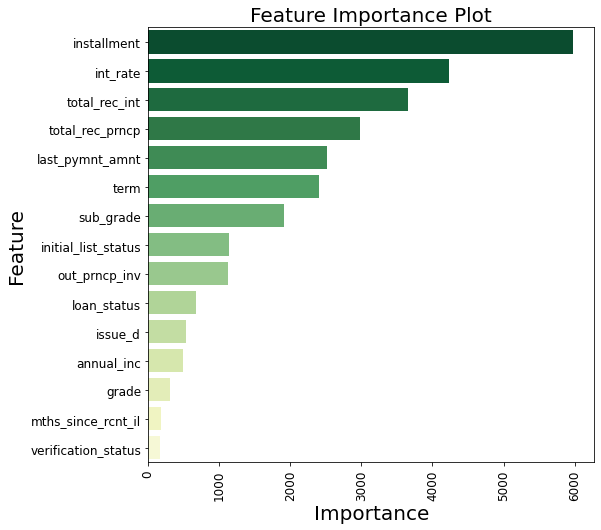

Feature Selection Plot Time taken : 0.6745941638946533
(799990, 30)
(799990,)
Trying to generate a rule tree...


  0%|          | 0/10 [00:00<?, ?it/s]

Rule Tree Generated

 #### SCALING ####
 #### SCALING DONE ####
(799990, 30)
(799990,)

 #### POWER TRANSFORMATIONS ####
 #### POWER TRANSFORMATIONS DONE ####
(799990, 30)
(799990,)

 #### Printing Sample Equation of the DATA ####
LABEL ENCODED FOR SAMPLE EQUATION


LINEAR REGRESSION EQUATION:


Predicted value = 54.077406468222854*int_rate + 32.84683472415081*installment + 0.004719361413454203*annual_inc + 0.19188003222130806*total_rec_int + 0.005767490352723786*total_bc_limit + 89.60134659028635*verification_status + -179.76695751858082*sub_grade + 4738.76456074143*term + -707.6508354008547

R squared = 0.977
(The closer R squared is to 1, the better the model is)

Where the columns are encoded like this:

+-----------------------+-------------------------------+
| verification_status   |   verification_status encoded |
|-----------------------+-------------------------------|
| Jun-17                |                             0 |
| May-17                |                         

Pandas Apply:   0%|          | 0/77 [00:00<?, ?it/s]

Shape after Pearsons Correlation (199998, 62)
num_df - (199998, 62)
disc_df - (199998, 25)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (199998, 1)
Applying Target Encoding...
Target Encoding completed
Applying Scaling and Transformations on Validation Set...
Scaling and Transformation completed

This is final shape of X_test : (199998, 30)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['int_rate', 'installment', 'annual_inc', 'fico_range_high', 'revol_bal',
       'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
       'open_il_12m', 'mths_since_rcnt_il', 'total_bal_il', 'max_bal_bc',
       'all_util', 'total_cu_tl', 'mths_since_recent_bc', 'num_tl_op_past_12m',
       'tot_hi_cred_lim', 'total_bc_limit', 'inq_last_6mths', 'loan_status',
       'last_pymnt_d', 'term', 'issue_d', 'verification_status',
       'initial_list_status', 'sub_grade', 'last_credi

<class 'list'>
XGB Validation done
CAT Validation done
LGBM val done
RF Validation done
ET Validation done
linear reg done
ridge reg done
SVC done
this is what you are printing [2 3]
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy : 99.84354828009516
Printing Rule Tree Model Information
    Machine Learning Model         RMSE           MSE          MAE
0  Decision Tree Regressor  12686.82456  1.609555e+08  9808.105121
Modelling completed
MODEL SAVED

Total Model Training Time taken : 987.3854539394379


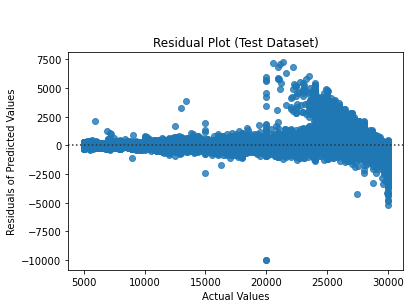

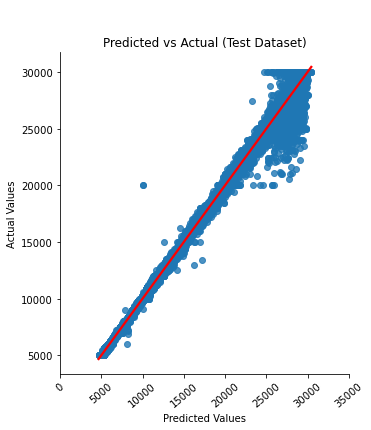


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |           30000    |              29771.2  |
|        2 |           25986.5  |              26177.4  |
|        3 |           20873.3  |              20878    |
|        4 |           17438    |              17426    |
|        5 |           14670.8  |              14715.2  |
|        6 |           11978.9  |              11951.5  |
|        7 |           10048.6  |              10054.2  |
|        8 |            8143.68 |               8149.53 |
|        9 |            5785.62 |               5787.37 |
|       10 |            5000    |               5010.05 |
+----------+--------------------+-----------------------+


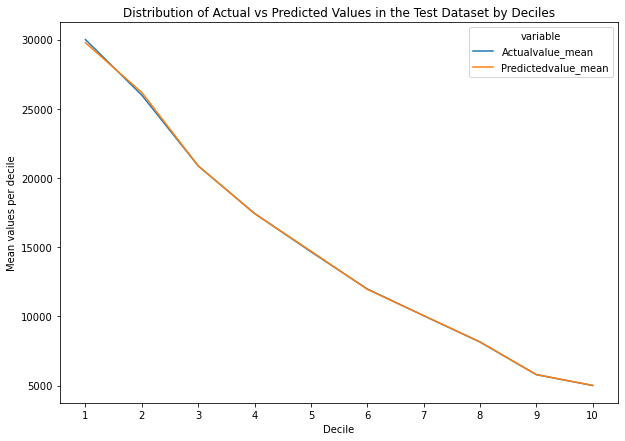

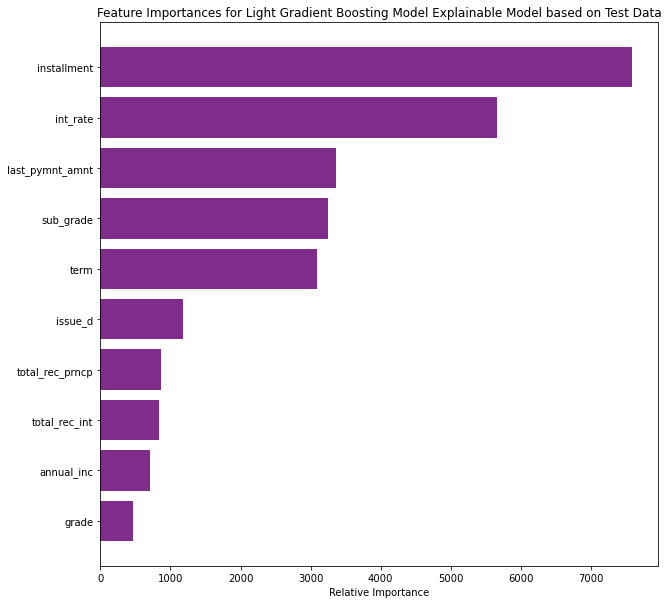

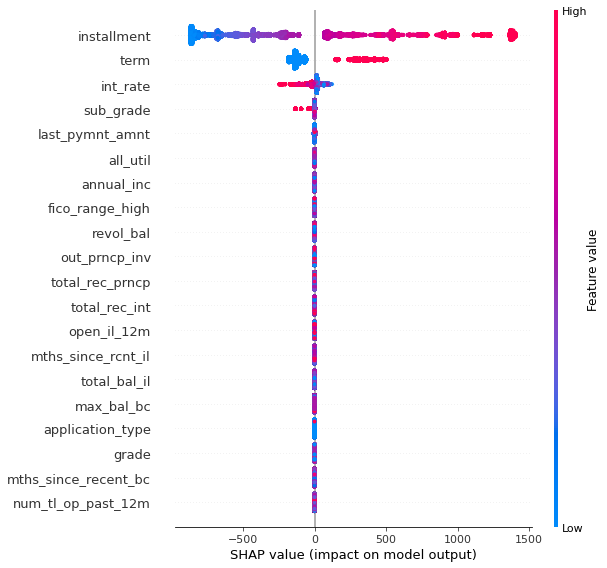

         term  Encoding
0   36 months  12811.68
1   60 months  20083.71

File Saved as preview.csv

Code executed Successfully

############# END ###########

	 #### CODE EXECUTED SUCCESSFULLY ####

	 #### END ####
list.remove(x): x not in list

#### TOTAL TIME TAKEN : 2330.5062000751495 ####


In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import *
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
import gc
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 100 rows of the dataset")
        try:
            df,csvPath = importFile(path,nrows=100)
        except ValueError:
            error_text = "Insufficient Data Error, Please collect more information"
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True
    gc.collect()
    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            gc.collect()
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df,info['target']) 
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                df = inputCap(df,info['target'])
                if df.empty == False:
                    init_info,validation = INIT(df,info)
                else:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            gc.collect()
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
                gc.collect()
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    del init_info
    gc.collect()
    try:
        eda_df = pd.read_csv('eda_df.csv')
        userInteractVisualization(eda_df,info['target'])
    except Exception as e:
        print(f'{e}')
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,id,Actual Values,Predicted Values
1,65304881,6400.0,6353.230
2,110382369,13000.0,13009.809
3,67315229,30000.0,29993.888
4,48150532,20000.0,19903.299
5,43195564,19750.0,19761.210
...,...,...,...
96,51008857,12000.0,11999.944
97,136578150,5000.0,4944.360
98,119260404,30000.0,30086.520
99,113286149,5000.0,5010.615


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,RMSE,MSE,MAE,BIC,Total time (hh:mm:ss)
1,Light Gradient Boosting Model,99.84%,321.39,103292.42,131.09,2309406.95,00:00:24
2,Ensemble (Light Gradient Boosting Model+Random Forest),99.84%,321.96,103659.80,116.06,2310117.02,00:05:16
3,Random Forest,99.80%,359.23,129048.05,125.34,2353930.66,00:04:55
4,ExtraTrees Regressor,99.69%,454.40,206477.28,196.76,2447930.84,00:02:16
5,CatBoost,85.46%,3098.53,9600915.63,2590.62,3215807.83,00:00:13
6,XGBoost,40.75%,6254.60,39120031.03,5490.27,3496760.26,00:01:41
7,Support Vector Machine,-1.97%,8205.03,67322475.84,7230.96,3605331.07,00:01:20
8,Ridge Regression,-558.02%,20843.15,434437008.64,20264.01,3978238.71,00:00:00
9,Linear Regression,-639.25%,22092.28,488068918.84,21482.59,4001519.61,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
